# Visuosemantic Analyses

## Adjectival Entanglement

In [ ]:
from diffusers import StableDiffusionPipeline
from matplotlib import pyplot as plt
import numpy as np
import time
import torch
import random
import daam

def set_seed(seed):
    gen = torch.Generator(device='cuda')
    random.seed(seed)
    np.random.seed(seed)
    torch.cuda.manual_seed(seed)
    torch.manual_seed(seed)

    return gen.manual_seed(s)


model = StableDiffusionPipeline.from_pretrained('stabilityai/stable-diffusion-2-base')
model = model.to('cuda')

In [6]:
def make_im_subplots(*args):
    fig, ax = plt.subplots(*args)

    for ax_ in ax.flatten():
        ax_.set_xticks([])
        ax_.set_yticks([])

    return fig, ax

s = int(time.time())
gen = set_seed(s)

with daam.trace(model, save_heads=True) as trc:
    blue_image = model('a blue car driving down the street', num_inference_steps=20, generator=gen).images[0]
    blue_map = trc.compute_global_heat_map().compute_word_heat_map('blue')

gen = set_seed(s)

with daam.trace(model, load_heads=True) as trc:
    green_image = model('a green car driving down the street', num_inference_steps=20, generator=gen).images[0]
    green_map = trc.compute_global_heat_map().compute_word_heat_map('green')

gen = set_seed(s)

with daam.trace(model, load_heads=True) as trc:
    red_image = model('a red car driving down the street', num_inference_steps=20, generator=gen).images[0]
    red_map = trc.compute_global_heat_map().compute_word_heat_map('red')

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

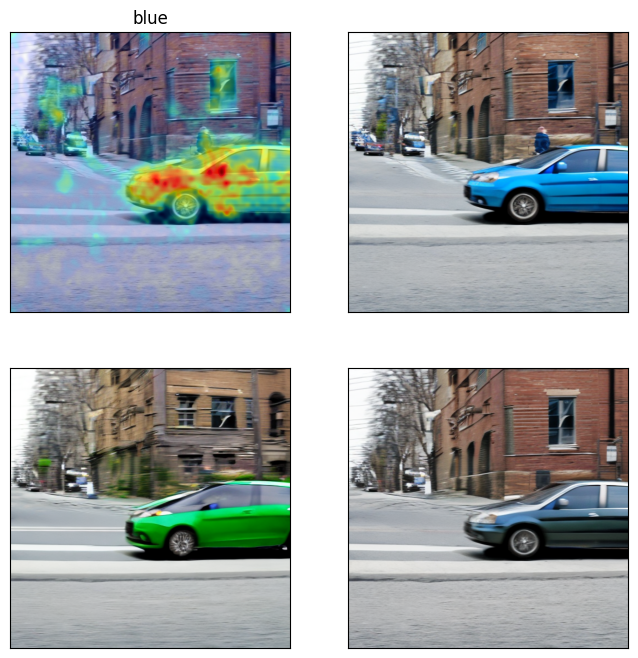

In [7]:
plt.rcParams['figure.figsize'] = (8, 8)
fig, ax = make_im_subplots(2, 2)

# Original images
ax[0, 1].imshow(blue_image)
ax[1, 0].imshow(green_image)
ax[1, 1].imshow(red_image)

# Heat map
blue_map.plot_overlay(blue_image, ax=ax[0, 0])

plt.show()

## Cohyponym Entanglement

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

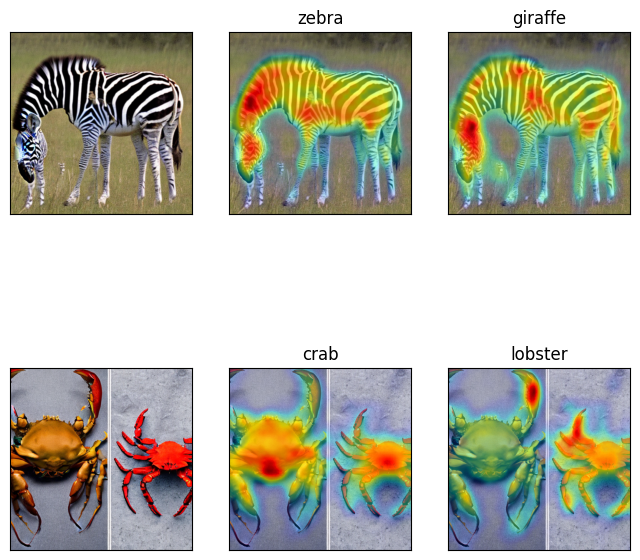

In [14]:
plt.rcParams['figure.figsize'] = (8, 8)
fig, ax = make_im_subplots(2, 3)

with daam.trace(model, save_heads=True) as trc:
    im1 = model('a zebra and a giraffe', num_inference_steps=20).images[0]
    heat_map = trc.compute_global_heat_map()
    zebra_map = heat_map.compute_word_heat_map('zebra')
    giraffe_map = heat_map.compute_word_heat_map('giraffe')

with daam.trace(model, save_heads=True) as trc:
    im2 = model('a crab and a lobster', num_inference_steps=20).images[0]
    heat_map = trc.compute_global_heat_map()
    crab_map = heat_map.compute_word_heat_map('crab')
    lobster_map = heat_map.compute_word_heat_map('lobster')

ax[0, 0].imshow(im1)
ax[1, 0].imshow(im2)
zebra_map.plot_overlay(im1, ax=ax[0, 1])
giraffe_map.plot_overlay(im1, ax=ax[0, 2])

crab_map.plot_overlay(im2, ax=ax[1, 1])
lobster_map.plot_overlay(im2, ax=ax[1, 2])

plt.show()

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

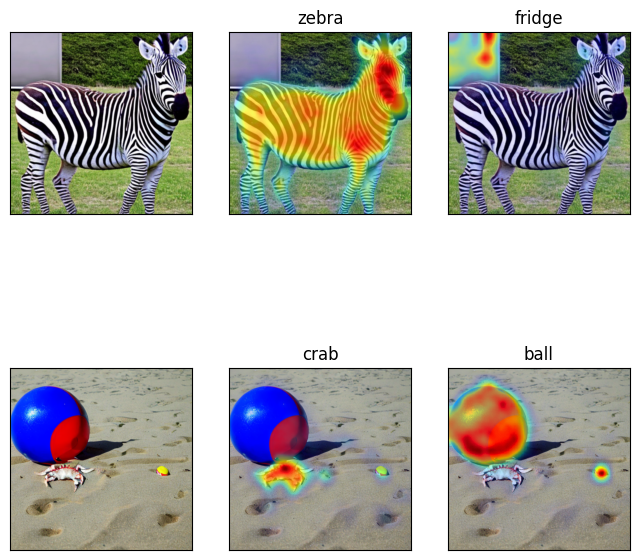

In [15]:
plt.rcParams['figure.figsize'] = (8, 8)
fig, ax = make_im_subplots(2, 3)

with daam.trace(model, save_heads=True) as trc:
    im1 = model('a zebra and a fridge', num_inference_steps=20).images[0]
    heat_map = trc.compute_global_heat_map()
    zebra_map = heat_map.compute_word_heat_map('zebra')
    giraffe_map = heat_map.compute_word_heat_map('fridge')

with daam.trace(model, save_heads=True) as trc:
    im2 = model('a crab and a beach ball', num_inference_steps=20).images[0]
    heat_map = trc.compute_global_heat_map()
    crab_map = heat_map.compute_word_heat_map('crab')
    lobster_map = heat_map.compute_word_heat_map('ball')

ax[0, 0].imshow(im1)
ax[1, 0].imshow(im2)
zebra_map.plot_overlay(im1, ax=ax[0, 1])
giraffe_map.plot_overlay(im1, ax=ax[0, 2])

crab_map.plot_overlay(im2, ax=ax[1, 1])
lobster_map.plot_overlay(im2, ax=ax[1, 2])

plt.show()